# TWEET EMOTION RECOGNITION WITH TENSORFLOW 

## 1]Setup and Imports

In [1]:
#Installing Hugging Face's nlp package
!pip install nlp

In [2]:
#Importing Libraries
%matplotlib inline

import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import nlp
import random

In [3]:
# Version of TensorFlow used in this project
print('Using TensorFlow version', tf.__version__)

Using TensorFlow version 2.10.0


## 2]Importing Data

### Importing the Tweet Emotion dataset

In [4]:
#Importing the Tweet Emotion dataset from hugging faces nlp package to object named 'dataset'
dataset = nlp.load_dataset('emotion')

Using custom data configuration default


**About dataset 'emotion':-**
- **It is a .pkl file(python pickle file)**
    - **A Python pickle file serializes a tuple of two numpy arrays, (feature, label)**
    - **Pickling helps in serializing and deserializing a python object structure**
    - **Pickle serializes the object (persist the object state) before writing to disk** 
    - **It basically converts the object into a character stream.By using the character stream we can restore the object state wherever and whenver we need it.**
    - **cpickle is the optimized version written in c, 1000 times faster than pickle.**
- **This dataset is available on kaggle as text file**

In [5]:
#Displaying the dataset
dataset

{'train': Dataset(features: {'text': Value(dtype='string', id=None), 'label': Value(dtype='string', id=None)}, num_rows: 16000),
 'validation': Dataset(features: {'text': Value(dtype='string', id=None), 'label': Value(dtype='string', id=None)}, num_rows: 2000),
 'test': Dataset(features: {'text': Value(dtype='string', id=None), 'label': Value(dtype='string', id=None)}, num_rows: 2000)}

In [6]:
#The above dataset is already divided into train,validation and test sets
#Every set contains features(coloumns) such as text(tweets) and labels(emotions)
#We have 1600,2000 and 2000 examples in train,validation and test sets respectively'text' and 'label' to objects tweets and labels respectively

- **Train set:** The sample of data used to train/fit the model.
- **Validation set:** A set of examples(held back from training) used to tune the parameters of a classifier, for example to choose the number of hidden units in a neural network.
    -  validation set is a sample of data held back from training your model that is used to give an estimate of model skill while tuning model’s hyperparameters.
- **Test set:** A set of examples used only to assess the performance of a fully-specified classifier

**<U>DIFFERENCE BETWEEN TEST AND VALIDATION SET:-</U>**<BR>
**The validation dataset is different from the test dataset that is also held back from the training of the model, but is instead used to give an unbiased estimate of the skill of the final tuned model when comparing or selecting between final models.**

### Creating train, validation and test sets

In [7]:
#Accesing train set from object dataset into a object called as 'train_set'
train_set=dataset['train']
#Now we have train set seperately in an object train_set

In [8]:
#Accesing validation set from object dataset into a object called as 'val_set'
val_set=dataset['validation']
#Now we have validation set seperately in an object val_set

In [9]:
#Accesing test set from object dataset into a object called as 'test_set'
test_set=dataset['test']
#Now we have test set seperately in an object test_set

### Extracting tweets and labels from the examples

In [10]:
# We created a function 'get_tweets'(can be named anything as its our own created function)
# We created function 'get_tweets' to access features 'text' and 'label' to objects tweets and labels respectively
#We created this function inorder to save time as acessing features for train_set,val_set,test_set is a same repeated task
# We passed 'get_tweets' as a example object on which our requirements run.
#If we call the function after creation on another dataframe or object it will do all the requirements and applications on that too. 
def get_tweets(data):
    tweets = [x['text'] for x in data]
    labels = [x['label'] for x in data]
    return tweets, labels

In [11]:
#Accesing features 'text' and 'label' to objects tweets_train and labels_train respectively from train_set
tweets_train, labels_train = get_tweets(train_set)

In [12]:
#Displaying 0th index elaements in both features of train_set
tweets_train[0], labels_train[0]

('i didnt feel humiliated', 'sadness')

In [13]:
#Accesing features 'text' and 'label' to objects tweets_val and labels_val respectively from val_set
tweets_val, labels_val = get_tweets(val_set)

In [14]:
#Displaying 0th index elaements in both features of val_set
tweets_val[0], labels_val[0]

('im feeling quite sad and sorry for myself but ill snap out of it soon',
 'sadness')

In [15]:
#Accesing features 'text' and 'label' to objects tweets_test and labels_test respectively from test_set
tweets_test, labels_test = get_tweets(test_set)

In [16]:
#Displaying 0th index elaements in both features of test_set
tweets_test[0], labels_test[0]

('im feeling rather rotten so im not very ambitious right now', 'sadness')

## 3]Tokenization of tweets

In [17]:
#Importing inbuilt Tokenizer from text preprocessing module from tensorflow 
from tensorflow.keras.preprocessing.text import Tokenizer

In [18]:
#Creating an object tokenizer(We can keep any name) to use Tokenizer() method
#We specified num_words=10000 in Tokenizer() means we only use ten thousand most frequent unique words in corpus to be tokenized
#oov_token means out of vocabulary words
#We specified oov_token='<UNK>' in Tokenizer() means rest of words other than 10000 most frequent words will be specified as out of vocabulary tokens
#These out of vocabulary words have the same token given as specified string '<UNK>' (unknown)
tokenizer = Tokenizer(num_words=10000, oov_token='<UNK>')
#Using the created object tokenizer to convert the corpus tweets_train having tweets of train set to sparse matrix stored in object 'count_matrix'(can keep any name)
count_matrix=tokenizer.fit_on_texts(tweets_train)

In [19]:
#So there will be sequences formed present in sparse matrix stored in 'count_matrix'

## 4]Padding and Truncating Sequences

##### Different tweets are of different lengths. But inorder to create a model for them they need to be in a fixed input shape. So we will calculate their lenths now and do padding,truncating to them if needed to get them into a fixed input shape

#### Calculating length of the tweets in train set 'tweets_train' 

In [20]:
# There will be many words in tweets of tweets_train
# We are iterating over every word in tweets_train using for loop and make the words seperate from eachother using split() method using space(' ') string as parameter in paranthesis
#t.split(' ') splits the 't' no.of words seperate from eachother using space as string in between them
#len() method used on the seperated words to calculate number of words or length of tweets.
lengths = [len(t.split(' ')) for t in tweets_train]

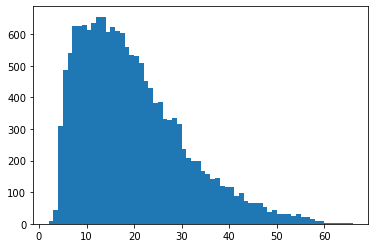

In [21]:
# Plotting Histogram for the length of tweets calculated
plt.hist(lengths, bins=len(set(lengths)))
plt.show()

#### Observations from the above graph:-
- **Most of the tweets have their lengths between 10 and 20**
- **There are very few tweets of length more than 50**

- **Let's truncate tweets of length greater than 50 as there are very few which makes it very minor and not very useful for results and obsevation**
- **Tweets with length less than 50 will be padded with zero '0' to get all the tweets to be of length 50**

#### Creating padded sequences

In [22]:
# Importing pad_sequences from sequence preprocessing of keras tensorflow
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [23]:
# We created a function 'get_sequences'(can be named anything as its our own created function)
# We created function 'get_sequences' to get padded sequences.
# First we get sequences(tokenized format of text in lists) and store it in object sequences by using tokenizer object
# Then we will use 'pad_sequences()' method to pad the sequences stored in object 'sequences' 
#We created this function inorder to save time as getting sequences from set,val_set,test_set  and padding them is a same repeated task
# We passed 'tweets' as a example object on which our requirements run.
#If we call the function after creation on another dataframe or object it will do all the requirements and applications on that too. 
def get_sequences(tweets):
    sequences = tokenizer.texts_to_sequences(tweets)
    # maxlen=50 means highest lenth allowed is 50
    #Post truncating is used then the tweets length>50 will be truncated/chopped to length 50 at from the end
    #Post padding is used means the tweets will be padded zero at the end
    padded_sequences = pad_sequences(sequences, truncating='post', maxlen=50, padding='post')
    return padded_sequences

In [24]:
#Using created function 'get_sequences' to get padded sequences from 'tweets_train'
padded_train_seq = get_sequences(tweets_train)

In [25]:
# Displaying 0th index element of all the padded sequences in padded_train_seq
padded_train_seq[0]

array([  2, 139,   3, 679,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0])

## 5]Preparing the Labels

In [26]:
#We created a set to labels_train as we know that set contains unique elements only.
#There will be many tweets having same class.So inorder to get the unique classes without duplication we created a set
#the created set is stored in object 'classes'
classes = set(labels_train)

In [27]:
#Displaying all the classes present in labels_train
print(classes)

{'anger', 'surprise', 'sadness', 'fear', 'joy', 'love'}


In [28]:
#From the above printed classes. We know that there are six classes(emotions) present in the training set

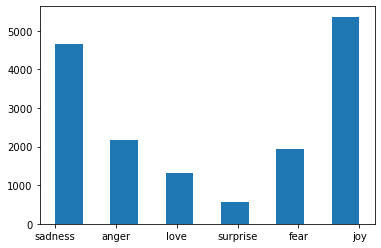

In [29]:
#Plotting histogram of labels_train to display all classes
plt.hist(labels_train, bins=11)
plt.show()

**<u>Observations from the above histogram:-</u>**
- **From the above histogram we can say that sadness and joy are the major classes**
- **love,anger and suprise are minor classes**
- **This shows class imbalance problem**
- **We can solve it by using different undersampling and oversampling methods**

In [30]:
# Here dictionaries are created because we can get key-value pairs in dictionaries
# We can apply it here to make name of classes and their corresponding numeric values as key-value pairs.

**enumerate():-The enumerate() function adds a counter as the key of the enumerate object.**
- **Syntax:-enumerate(iterable, start)**
    - **iterable- is an iterable object(Ex-tuples,set,lists,...)**
    - **start-A Number. Defining the start number of the enumerate object. Default 0**
- **The returned object will be an enumerate object in tuple form**
- **Exapmle:-**
      x = ('apple', 'banana', 'cherry')
      y = enumerate(x)
      print(list(y)
     **Output:-** [(0, 'apple'), (1, 'banana'), (2, 'cherry')]<br>
    **From the above output we can say that every element has a counter index/key added in a tuple format**

In [31]:
x=enumerate(classes)
print(list(x))

[(0, 'anger'), (1, 'surprise'), (2, 'sadness'), (3, 'fear'), (4, 'joy'), (5, 'love')]


#### Creating classes to index dictionary

In [32]:
# enumerate() function is applied on dictionary classes which returns a tuple format (i,c)
# where 'i' means index/numeric value and 'c' means class name
# So we applied a for loop to iterate over all these tuples and make them as dictionary(c,i) with key as 'c' and values as 'i'
# key as 'c' and values as 'i'.So, named it as classes_to_index
classes_to_index = dict((c, i) for i, c in enumerate(classes))

In [33]:
# Displaying classes_to_index dictionary
classes_to_index

{'anger': 0, 'surprise': 1, 'sadness': 2, 'fear': 3, 'joy': 4, 'love': 5}

In [34]:
#items( ) method is used to grab all the items(also known as key-value pairs) in the dictionary 
#and the output will be all the key-value pairs paired in tuples format.
classes_to_index.items()

dict_items([('anger', 0), ('surprise', 1), ('sadness', 2), ('fear', 3), ('joy', 4), ('love', 5)])

#### Creating index to classes dictionary

In [35]:
# We applied items() method on classes_to_index dictionary to get all key-value pairs (classes:numeric) in tuple format
# We applied a for loop on this tuple format to again make them as a dictionary but here key as 'i' and value as 'c'
# key as 'i' and value as 'c'.So, named it as index_to_classes
index_to_classes = dict((i,c) for c,i in classes_to_index.items())

In [36]:
# Displaying index_to_classes dictionary
index_to_classes

{0: 'anger', 1: 'surprise', 2: 'sadness', 3: 'fear', 4: 'joy', 5: 'love'}

In [37]:
# If we use get() method on a dictionary and pass a key we will get the value corresponding to that key
classes_to_index.get('joy')

4

#### Converting text labels to numeric labels 

In [38]:
# labels contain classes(all emotions joy,surprise,love,...)
# We applied a for loop and iterate over every class in labels
# These iterated classes/objects are passed as keys in get() method applied on classes_to_index dict where classes are keys
# When we pass these classes(as keys) in get() applied on a dict,we will get corresponding numeric(as values) of that key as output
# These numeric values are then formed into a nd-array using np.array() method [numpy arrays]
# Lambda functon is created to get these nd-array values(classes converted to numeric values)
names_to_ids = lambda labels: np.array([classes_to_index.get(x) for x in labels])

#### <u>LAMBDA FUNCTONS:-</u> 
- **Python Lambda Functions are anonymous function means that the function is without a name. As we already know that the def keyword is used to define a normal function in Python. Similarly, the lambda keyword is used to define an anonymous function in Python.** 
- **Syntax:- lambda arguments: expression**

In [39]:
# Using names_to_ids function on labels_train to get converted numeric values in form of a nd-array 
labels_train_num = names_to_ids(labels_train)

In [40]:
#Displaying 0th element of labels_train_num to check if it is correct
#Previously when we printed 0th index element of labels_train we got 'sadness'
#So after converting classes(labels_train) to numeric(in labels_train_num).We should get corresponding numeric value of 'sadness'
#Corresponding value of 'sadness' is '5'. {0: 'fear', 1: 'love', 2: 'joy', 3: 'anger', 4: 'surprise', 5: 'sadness'} 
print(labels_train_num[0])

2


## 6]Creating the Model
- **Step1:-Create a model**
- **Step2:-Compile the created model**
- **Step3:-The compiled model will later be trained**
- **Step4:-Model Evaluation**
- **Step5:-Model Prediction**

#### Creating the model 

In [41]:
#Sequential() class is used to create a sequential model 'model_created'
#A list of layers are passed inside Sequential() class to create a sequential model 'model_created'
model_created = tf.keras.models.Sequential([
    #Embedding layer with inp_dim=10000,output_dim=16 and input_length/max length of sequence=50
    tf.keras.layers.Embedding(10000, 16, input_length=50),
    #Bi-directional LSTM Layer which gives output for every time step as return_sequences=True
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(20, return_sequences=True)),
    #Ouput from previous Bi-directional LSTM Layer is fed to this LSTM Layer 
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(20)),
    #Dense Layer to change the dimensions of output 
    #to make it easy for model to define relationship b/w values of data the model is working on
    #Output size specified as 6 dimensions and activation function as 'softmax'
    #As this is a multi class classification problem, it is best to use 'softmax' as activation function
    #We need only six classes(Emotions:-joy,love,surprise,...).So reduce dimensions to six
    tf.keras.layers.Dense(6, activation='softmax')
])

#### Compiling the model

In [42]:
#compile() method of keras is used to compile the already created model 'model_created'
model_created.compile(
    #compile() method has 3 main arguments loss,optimizer and metrics
    #As there is no one-hot encoded data it is better to use 'sparse_categorical_crossentropy'
    loss='sparse_categorical_crossentropy',
    #'adam' optimizer is best for sparse and noisy data
    optimizer='adam',
    metrics=['accuracy']
)

**compile() method has 3 main arguments:-** 
- **loss:-Loss function is used to find error or deviation in the learning process.** 
    - **Keras requires loss function during model compilation process**
    - **Examples of loss functions:-** mean_squared_error,mean_absolute_error,mean_absolute_percentage_error
        categorical_crossentropy,sparse_categorical_crossentropy,etc.,
- **optimizer:-It is used to optimize the input weights by comparing the prediction and the loss function**
    - **Examples of optimizers:-** SGD(Stochastic Gradient Descent),RMSprop,Adagrad,adam,etc.,
- **metrics:-Metrics is used to evaluate the performance of your model. It is similar to loss function, but not used in training process**
    - **Few metrics are:-** accuracy,binary_accuracy,categorical_accuracy,sparse_categorical_accuracy
        sparse_top_k_categorical_accuracy,cosine_proximity,clone_metric,etc.,

#### Model Summary 

In [43]:
#Displaying summary of the model 'model_created'
model_created.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 50, 16)            160000    
                                                                 
 bidirectional (Bidirectiona  (None, 50, 40)           5920      
 l)                                                              
                                                                 
 bidirectional_1 (Bidirectio  (None, 40)               9760      
 nal)                                                            
                                                                 
 dense (Dense)               (None, 6)                 246       
                                                                 
Total params: 175,926
Trainable params: 175,926
Non-trainable params: 0
_________________________________________________________________


**<u>Observations from the above summary:-</u>**
- **We have one embedding layer,two bi-directional LSTM layers and one dense layer in the model**
- **The first bidirectional LSTM layer has output shape(None,50,40) which means it is giving output of all sequences not only the last sequence**

## 7]Training the Model

#### Preparing a validation set 

In [44]:
#Accesing features 'text' and 'label' to objects tweets_val and labels_val respectively from val_set
tweets_val, labels_val = get_tweets(val_set)
#Using created function 'get_sequences' to get padded sequences from 'tweets_val'
padded_val_seq = get_sequences(tweets_val)
# Using names_to_ids function on labels_val to get converted numeric values of classes/labels in form of a nd-array 
labels_val_num = names_to_ids(labels_val)

In [45]:
#displaying 0th index tweet of validation set 'tweets_val' , class/label labels_val
#with its class/label(convertednumeric value of emotion) 'labels_val_num'
tweets_val[0], labels_val[0], labels_val_num[0]

('im feeling quite sad and sorry for myself but ill snap out of it soon',
 'sadness',
 2)

#### Training the model

In [46]:
#Normally we split the dataset using split() method in to X_train,y_train,X_test and y_test to train and evaluate the model
#But the given dataset already is divided into train,val,test sets from the starting.
#So we can already use the data 

In [47]:
#training the model using fit()
model_trained = model_created.fit(
    #Training the model using train set's padded sequences and converted numeric values of labels/classes
    # X_train=padded_train_seq and y_train=labels_train_num
    padded_train_seq,labels_train_num,
    #Validation set used to tune the parameters of a classifier(number of hidden units,epochs,etc,.) in a neural network.
    # X_val=padded_val_seq and y_val=labels_val_num
    validation_data=(padded_val_seq,labels_val_num),
    #Number of epochs to run=20
    epochs=20,
    #callbacks specified with monitor='val_accuracy' and patience=2 
    # It means if there is no improvement in val_accuracy for continuous 2 epochs then the training of model will be stopped 
    # even before 20 epochs completed 
    callbacks=[
        tf.keras.callbacks.EarlyStopping(monitor='val_accuracy', patience=2)
    ]
)

Epoch 1/20
500/500 [==============================] - 44s 63ms/step - loss: 1.3056 - accuracy: 0.4853 - val_loss: 0.7612 - val_accuracy: 0.7220
Epoch 2/20
500/500 [==============================] - 29s 58ms/step - loss: 0.5482 - accuracy: 0.8066 - val_loss: 0.6400 - val_accuracy: 0.7925
Epoch 3/20
500/500 [==============================] - 27s 55ms/step - loss: 0.2694 - accuracy: 0.9148 - val_loss: 0.4056 - val_accuracy: 0.8745
Epoch 4/20
500/500 [==============================] - 28s 56ms/step - loss: 0.1568 - accuracy: 0.9498 - val_loss: 0.3818 - val_accuracy: 0.8830
Epoch 5/20
500/500 [==============================] - 28s 56ms/step - loss: 0.1283 - accuracy: 0.9606 - val_loss: 0.3670 - val_accuracy: 0.8860
Epoch 6/20
500/500 [==============================] - 28s 55ms/step - loss: 0.1016 - accuracy: 0.9682 - val_loss: 0.5103 - val_accuracy: 0.8745
Epoch 7/20
500/500 [==============================] - 31s 62ms/step - loss: 0.0963 - accuracy: 0.9713 - val_loss: 0.3429 - val_accuracy:

- **Accuracy on train set:97.72%**
- **Validation accuracy or accuracy on validation set:87.05%**

**From the above observation of epochs:-**
- **The val_accuracy of 11th,12th,13th epochs are 0.8955,0.8905,0.8900 respectively**
- **The val_accuracy is not improving for continuous two epochs(patience=2) in 12th and 13th epochs but decreasing after 11th epoch**
    - **So the model training stopped after 13th epoch.**

## 8]Evaluating the Model

#### Visualizing training history

In [48]:
# We created a function show_history to calculate accuracy,validation accuracy of model came after training from TensorFlow
def show_history(h):
    epochs_trained = len(h.history['loss'])
    plt.figure(figsize=(16, 6))

    plt.subplot(1, 2, 1)
    plt.plot(range(0, epochs_trained), h.history.get('accuracy'), label='Training')
    plt.plot(range(0, epochs_trained), h.history.get('val_accuracy'), label='Validation')
    plt.ylim([0., 1.])
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(range(0, epochs_trained), h.history.get('loss'), label='Training')
    plt.plot(range(0, epochs_trained), h.history.get('val_loss'), label='Validation')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()

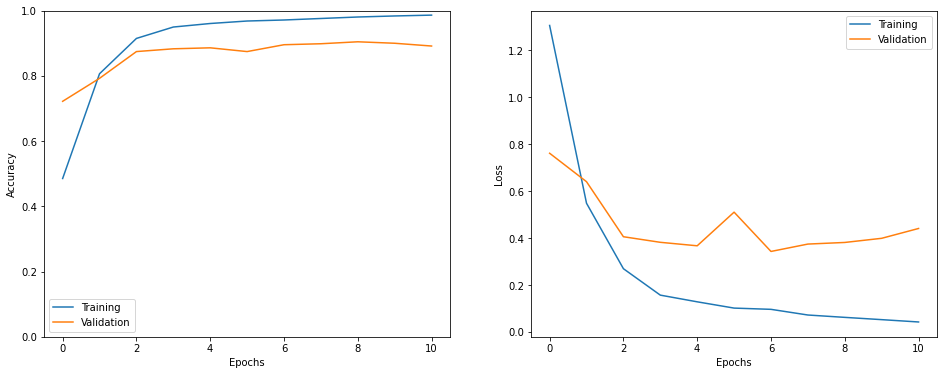

In [49]:
#Visualizing training history. Accuracy and loss of training and validation sets using the created function show_history
show_history(model_trained)

#### Prepraring a test set

In [50]:
#Accesing features 'text' and 'label' to objects tweets_test and labels_test respectively from test_set
tweets_test, labels_test = get_tweets(test_set)
#Using created function 'get_sequences' to get padded sequences from 'tweets_test'
padded_test_seq = get_sequences(tweets_test)
# Using names_to_ids function on labels_test to get converted numeric values of classes/labels in form of a nd-array 
labels_test_num = names_to_ids(labels_test)

**Model Evaluation:-**
- **Evaluation is the process to check whether the created model is fit for the given problem**
- **test data X_test and test data label y_test are the two arguments used in evaluate( ) method.**

#### Evaluating created model using evaluate()

In [51]:
#Using evaluate() method to evaluate the created model 
_ = model_created.evaluate(padded_test_seq, labels_test_num)

63/63 [==============================] - 1s 18ms/step - loss: 0.4566 - accuracy: 0.8790


#### A look at random individual predictions on the test set 

In [58]:
#'i' is the index of the tweet randomly selected from total no,of tweets(0 to length of test set-1)
#randint is inbuilt function of random module which is used to generate random numbers
#As randint from random module use on total no.of tweets.It selects a random tweet which is stored in index 'i'
i = random.randint(0, len(labels_test_num) - 1)

#Printing tweet from test set of the above grabbed random index [i]
print('Tweet Sentence:', tweets_test[i])

#Printing label(class) in words from test set of the above grabbed random index [i]
#labels_test_num[i] gives a converted numeric value of label(class)
#When this converted numeric value of class is used as key on 'index_to_classes' dictionary,it will return the label(class) in words
print('Emotion:', index_to_classes[labels_test_num[i]])

#Predict class of padded sequence of test set with random index[i]
p = model_created.predict(np.expand_dims(padded_test_seq[i], axis=0))[0]

#The above prediction 'p' is converted into integer using "np.argmax(p).astype('uint8')"
#Then 'p' which is now in integer form of converted numeric value of label(class) is used as a key on 'index_to_classes'
#to get label(class/emotion) in words format
pred_class=index_to_classes[np.argmax(p).astype('uint8')]

#Printing the prediction of class from the above prediction
print('Predicted Emotion:', pred_class)

Tweet Sentence: i feel just an on going dull pain for a fews hours or a day in my chest
Emotion: sadness
1/1 [==============================] - 0s 33ms/step
Predicted Emotion: sadness


In [81]:
#prediction 'p' is not in form of array of integers but in float(decimals).So convert to integers using "np.argmax(p).astype('uint8')" 
p

array([9.3898316e-06, 4.3312141e-07, 3.7293011e-04, 8.6598029e-06,
       9.9957925e-01, 2.9360343e-05], dtype=float32)

In [83]:
#'p' is converted into integer using "np.argmax(p).astype('uint8')"
#The converted integer is nothing but converted numeric value of labels(class)
#Here 4 means label(class) joy
np.argmax(p).astype('uint8')

4

**Model Prediction:-**
- **It is the final step to get predicted results from the generated model.**
- **Keras provides predict( ) method to get the predictions of the trained model**
- **Predictions are made using 'test data'(X_test) to produce 'predicted test data labels'(y_pred)**
- **SYNTAX OF predict() METHOD:-**
    - **CLASSIFICATION PROBLEMS:-**
        - **MULTICLASS CLASSIFICATION:-** np.argmax(model.predict(X_test), axis=-1)
        - **BINARY CLASSIFICATION:-** (model.predict(X_test) > 0.5).astype("int32")
    - **REGRESSION PROBLEMS:-** model.predict(X_test)

#### All predictions on the test set

In [67]:
#Using predict() to get predicted data
#Here 'test data' X_test=padded_test_seq and the 'test data label prediction' y_pred=labels_predicted
labels_predicted = np.argmax(model_created.predict(padded_test_seq), axis=-1)

#Shape of 
labels_predicted.shape, labels_test_num.shape

63/63 [==============================] - 1s 18ms/step


((2000,), (2000,))

In [68]:
# We created function show_confusion_matrix to calculate and plot confusion matrix  
def show_confusion_matrix(y_test, y_pred, classes):
    from sklearn.metrics import confusion_matrix
    
    cm = confusion_matrix(y_test, y_pred, normalize='true')

    plt.figure(figsize=(8, 8))
    sp = plt.subplot(1, 1, 1)
    ctx = sp.matshow(cm)
    plt.xticks(list(range(0, 6)), labels=classes)
    plt.yticks(list(range(0, 6)), labels=classes)
    plt.colorbar(ctx)
    plt.show()

### Confusion Matrix

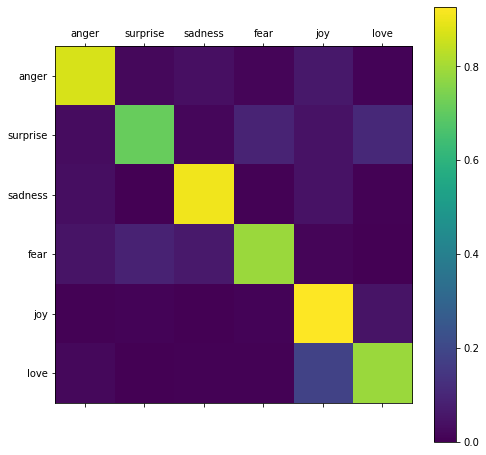

In [69]:
#Displaying confusion matrix using the created function show_confusion_matrix
#Here y_test=labels_test_num and y_pred=labels_predicted
show_confusion_matrix(labels_test_num, labels_predicted, list(classes))

### Classification report

In [70]:
#importing classification_report and confusion_report from sklearn.metrics
from sklearn.metrics import classification_report, confusion_matrix

In [71]:
#Classification report for labels_test(y_test which is a True class) and labels_predicted(y_pred which are Predictions)
#Here y_test=labels_test_num and y_pred=labels_predicted
print(classification_report(labels_test_num,labels_predicted))

              precision    recall  f1-score   support

           0       0.85      0.87      0.86       275
           1       0.60      0.71      0.65        66
           2       0.95      0.91      0.93       581
           3       0.90      0.79      0.84       224
           4       0.89      0.93      0.91       695
           5       0.73      0.79      0.76       159

    accuracy                           0.88      2000
   macro avg       0.82      0.83      0.82      2000
weighted avg       0.88      0.88      0.88      2000

